In [1]:
# Modify the file 00_setup.py to define input/output file paths on your system
# The information in 00_setup.py will be used across notebooks
from importlib.machinery import SourceFileLoader
setup = SourceFileLoader("setup", "./00_setup.py").load_module()

## Performance Summaries
Get metrics from different runs and combine

In [2]:
import numpy as np
import pandas as pd
import importlib

In [3]:
from pathlib import Path

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
from sba_nn.sba_nn import sbnn_plot
sbnn_plot.plot_defaults(style='seaborn-colorblind')

## File Dictionaries

##### Initial embedding tests

In [6]:
dict_1_tests = {
    'base': Path(setup.temp_path).joinpath('02_'),
    'naics':  Path(setup.temp_path).joinpath('03_'),
    'naics+hier':  Path(setup.temp_path).joinpath('04_'),
    'naics data rand':  Path(setup.temp_path).joinpath('05_'),
    'naics+hier data rand':  Path(setup.temp_path).joinpath('06_'),
    'naics cust test': Path(setup.temp_path).joinpath('10_'),
    'naics data gen': Path(setup.temp_path).joinpath('11_'),
    'naics+hier data gen': Path(setup.temp_path).joinpath('12_')
}

##### Loops over injection rate

In [7]:
dict_2_rate_loop = {
    'irloop naics+hier data gen': Path(setup.temp_path).joinpath('13_'),
    'irloop naics data gen':  Path(setup.temp_path).joinpath('14_'),  
    'ds irloop naics+hier data gen': Path(setup.temp_path).joinpath('26_'),
    'ds irloop naics data gen':  Path(setup.temp_path).joinpath('27_'),  
}

##### Downsample tests

In [8]:
dict_3_ds_tests = {
    'ds naics': Path(setup.temp_path).joinpath('20_'),
    'ds naics data rand':  Path(setup.temp_path).joinpath('21_'),
    'ds naics data gen':  Path(setup.temp_path).joinpath('22_'),
    'ds naics+hier':  Path(setup.temp_path).joinpath('23_'),
    'ds naics+hier data rand':  Path(setup.temp_path).joinpath('24_'),
    'ds naics+hier data gen': Path(setup.temp_path).joinpath('25_')
}

##### Loops over downsample fractions

In [9]:
dict_4_ds_loop = {
    'dsloop naics': Path(setup.temp_path).joinpath('30_'),
    'dsloop naics+hier':  Path(setup.temp_path).joinpath('31_'),
    'dsloop naics data rand':  Path(setup.temp_path).joinpath('32_'),
    'dsloop naics+hier data rand':  Path(setup.temp_path).joinpath('33_'),
    'dsloop naics data gen':  Path(setup.temp_path).joinpath('34_'),
    'dsloop naics+hier data gen': Path(setup.temp_path).joinpath('35_')
}

## Metrics

##### Test metrics (regular, downsampled)

In [10]:
test_dict_list = [dict_1_tests, dict_3_ds_tests]
test_dict_all = {k: v for d in test_dict_list for k, v in d.items()}

In [11]:
test_dict_all_metrics= {k:v.parent / (v.name + 'REPORT_metrics.csv') for k, v in test_dict_all.items()}

In [12]:
test_set_metrics = pd.concat([pd.read_csv(v) for k, v in test_dict_all_metrics.items()],
                        keys = test_dict_all_metrics.keys()) \
    .reset_index(level=0) \
    .drop(columns=['Unnamed: 0'], errors='ignore') \
    .rename(columns={'level_0':'model'})

In [13]:
test_set_metrics.to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_nonloop.csv'), index=False)
test_set_metrics[(test_set_metrics['dset'] == 'test') &
                (~(test_set_metrics['dset_naics_holdout'].isna()))] \
    .to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_nonloop_test.csv'), index=False)

In [14]:
test_set_metrics.to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_nonloop.csv'), index=False)
test_set_metrics[(test_set_metrics['dset'] == 'test') &
                (test_set_metrics['dset_naics_holdout'] == 1) &
                (~test_set_metrics['model'].str.startswith('ds '))] \
    .sort_values('average_precision_score', ascending=False)

,model,dset,accuracy_score,f1_score,precision_score,recall_score,average_precision_score,roc_auc_score,dset_naics_holdout
4,naics+hier data gen,test,0.667965,0.454397,0.337824,0.693812,0.385357,0.739736,1.0
4,naics+hier data rand,test,0.666348,0.456108,0.337785,0.702016,0.381281,0.738753,1.0
4,naics+hier,test,0.548938,0.430542,0.287638,0.855634,0.363896,0.727930,1.0
4,base,test,0.621576,0.437015,0.310590,0.737017,0.353046,0.721018,1.0
4,naics data rand,test,0.659355,0.433432,0.324159,0.653836,0.352953,0.718785,1.0
4,naics data gen,test,0.607956,0.437327,0.306259,0.764511,0.352904,0.720349,1.0
4,naics cust test,test,0.537649,0.424242,0.282138,0.854761,0.349626,0.718901,1.0
4,naics,test,0.540746,0.426159,0.283730,0.855721,0.346411,0.718357,1.0


In [15]:
test_set_metrics.to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_nonloop.csv'), index=False)
test_set_metrics[(test_set_metrics['dset'] == 'test') &
                (test_set_metrics['dset_naics_holdout'] == 0) &
                (~test_set_metrics['model'].str.startswith('ds '))] \
    .sort_values('average_precision_score', ascending=False)

,model,dset,accuracy_score,f1_score,precision_score,recall_score,average_precision_score,roc_auc_score,dset_naics_holdout
3,naics data gen,test,0.645615,0.447497,0.327483,0.706361,0.380296,0.727207,0.0
3,naics+hier,test,0.663918,0.446207,0.335390,0.666392,0.380095,0.726571,0.0
3,naics+hier data gen,test,0.657880,0.448441,0.333442,0.684522,0.379818,0.726954,0.0
3,naics+hier data rand,test,0.667152,0.446197,0.337033,0.659954,0.379570,0.726183,0.0
3,naics,test,0.658246,0.447250,0.333081,0.680505,0.379322,0.726497,0.0
3,naics data rand,test,0.665686,0.445767,0.336089,0.661705,0.378818,0.726329,0.0
3,naics cust test,test,0.652406,0.448357,0.330866,0.695236,0.378482,0.726526,0.0
3,base,test,0.600835,0.425687,0.300766,0.728097,0.338248,0.697015,0.0


In [16]:
test_set_metrics.to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_nonloop.csv'), index=False)
test_set_metrics[(test_set_metrics['dset'] == 'test') &
                (test_set_metrics['dset_naics_holdout'] == 1) &
                (test_set_metrics['model'].str.startswith('ds '))] \
    .sort_values('average_precision_score', ascending=False)

,model,dset,accuracy_score,f1_score,precision_score,recall_score,average_precision_score,roc_auc_score,dset_naics_holdout
4,ds naics+hier data gen,test,0.656572,0.448060,0.329591,0.699485,0.365265,0.727972,1.0
4,ds naics+hier data rand,test,0.645440,0.449289,0.325351,0.725757,0.363327,0.726720,1.0
4,ds naics+hier,test,0.596180,0.442513,0.305231,0.804224,0.348779,0.719503,1.0
4,ds naics data gen,test,0.615227,0.430971,0.305529,0.731169,0.339131,0.710802,1.0
4,ds naics data rand,test,0.587188,0.430768,0.296997,0.783800,0.332818,0.706708,1.0
4,ds naics,test,0.525769,0.420679,0.278023,0.864013,0.328941,0.706302,1.0


## Downsample Loop
Plot.   2 rows - NAICS only, NAICS+hier.  2 columns - test and holdout.   3 lines per plot (unmodified data, fixed rand, generator rand).  

In [17]:
ds_metrics_dict = {k:v.parent / (v.name + 'REPORT_loop_metrics.csv') for k, v in dict_4_ds_loop.items()}

In [18]:
ds_metrics = pd.concat([pd.read_csv(v) for k, v in ds_metrics_dict.items()],
                        keys = ds_metrics_dict.keys()) \
    .reset_index(level=0) \
    .drop(columns=['Unnamed: 0'], errors='ignore') \
    .rename(columns={'level_0':'model'})

In [19]:
ds_metrics['model'].value_counts()

model
dsloop naics                   45
dsloop naics+hier              45
dsloop naics data rand         45
dsloop naics+hier data rand    45
dsloop naics data gen          45
dsloop naics+hier data gen     45
Name: count, dtype: int64

In [20]:
# Feature - data treatment
cond = [ds_metrics['model'].str.contains('data rand'),
        ds_metrics['model'].str.contains('data gen')]
choice = ['fixed randomization', 'shuffle randomization']
ds_metrics['data_treatment'] = np.select(cond, choice, 'unmodified data')

In [21]:
pd.crosstab(ds_metrics['model'], ds_metrics['data_treatment'])

data_treatment,fixed randomization,shuffle randomization,unmodified data
model,,,
dsloop naics,0,0,45
dsloop naics data gen,0,45,0
dsloop naics data rand,45,0,0
dsloop naics+hier,0,0,45
dsloop naics+hier data gen,0,45,0
dsloop naics+hier data rand,45,0,0


In [22]:
# Feature - NAICS only vs NAICS+hieararchy
ds_metrics['hier_flag'] = np.where(ds_metrics['model'].str.contains('hier'), 1, 0)

In [23]:
pd.crosstab(ds_metrics['model'], ds_metrics['hier_flag'])

hier_flag,0,1
model,,
dsloop naics,45,0
dsloop naics data gen,45,0
dsloop naics data rand,45,0
dsloop naics+hier,0,45
dsloop naics+hier data gen,0,45
dsloop naics+hier data rand,0,45


In [24]:
ds_metrics.to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_loop_downsample.csv'), index=False)

##### Plot
I didn't record the sizes for all tests but they should all be the same (or very similar)

In [25]:
ds_metrics_test = ds_metrics[~ds_metrics['dset_naics_holdout'].isna()]

In [26]:
ds_metrics_test[ds_metrics_test['rate'] == 0.95][['model', 'average_precision_score', 'dset_naics_holdout',
                                                  'hier_flag', 'data_treatment']] \
    .sort_values(['dset_naics_holdout', 'hier_flag'])

,model,average_precision_score,dset_naics_holdout,hier_flag,data_treatment
38,dsloop naics,0.377062,0.0,0,unmodified data
38,dsloop naics data rand,0.378691,0.0,0,fixed randomization
38,dsloop naics data gen,0.380609,0.0,0,shuffle randomization
38,dsloop naics+hier,0.380598,0.0,1,unmodified data
38,dsloop naics+hier data rand,0.378425,0.0,1,fixed randomization
38,dsloop naics+hier data gen,0.381015,0.0,1,shuffle randomization
39,dsloop naics,0.348513,1.0,0,unmodified data
39,dsloop naics data rand,0.348434,1.0,0,fixed randomization
39,dsloop naics data gen,0.353664,1.0,0,shuffle randomization
39,dsloop naics+hier,0.373376,1.0,1,unmodified data


In [27]:
ds_metrics_test[['rate', 'train_size', 'model']].drop_duplicates() \
    .pivot(index='rate', columns='model', values='train_size')

model,dsloop naics,dsloop naics data gen,dsloop naics data rand,dsloop naics+hier,dsloop naics+hier data gen,dsloop naics+hier data rand
rate,,,,,,
0.01,4468.0,4468.0,NaN,NaN,4468.0,NaN
0.05,22342.0,22342.0,NaN,NaN,22342.0,NaN
0.10,44684.0,44684.0,NaN,NaN,44684.0,NaN
0.20,89369.0,89369.0,NaN,NaN,89369.0,NaN
0.40,178739.0,178739.0,NaN,NaN,178739.0,NaN
0.70,312793.0,312793.0,NaN,NaN,312793.0,NaN
0.90,402163.0,402163.0,NaN,NaN,402163.0,NaN
0.95,424505.0,424505.0,NaN,NaN,424505.0,NaN
0.99,442379.0,442379.0,NaN,NaN,442379.0,NaN


In [28]:
ds_sizes = ds_metrics_test[~ds_metrics_test['train_size'].isna()] \
    [['rate', 'train_size']] \
    .drop_duplicates('rate')

In [29]:
ds_metrics_test = ds_metrics_test.drop(columns='train_size') \
    .merge(ds_sizes, on='rate')

In [30]:
ds_metrics_test_pivot = ds_metrics_test \
    .pivot(index=['train_size', 'hier_flag', 'dset_naics_holdout'], 
           columns='data_treatment', values='average_precision_score') 

In [31]:
ds_metrics_test_pivot = ds_metrics_test_pivot[['unmodified data', 'fixed randomization', 'shuffle randomization']]

In [32]:
ds_metrics_test_pivot.reset_index(level=[1,2], inplace=True)

In [33]:
groups = ds_metrics_test_pivot.groupby(['hier_flag', 'dset_naics_holdout'])

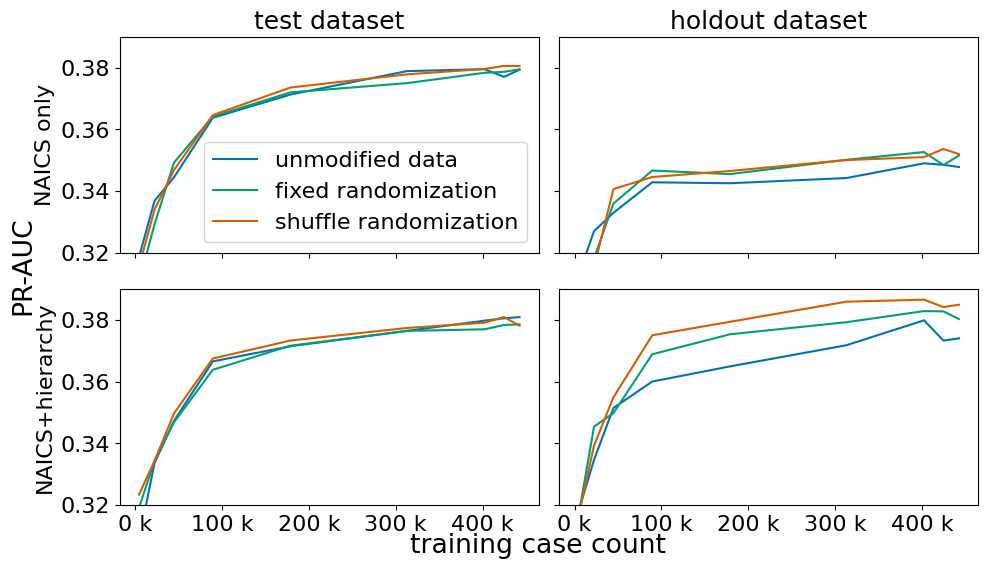

In [55]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(11,6))
for n, g in groups:
    g[['unmodified data', 'fixed randomization', 'shuffle randomization']].plot(ax=ax[int(n[0]), int(n[1])])
    ax[int(n[0]), int(n[1])].legend().set_visible(False)
    ax[int(n[0]), int(n[1])].set_xlabel(None)
    
ax[0, 0].set_ylim(0.32, 0.39)
ax[0, 0].margins(tight=True)
#ax[0, 0].set_ymargin(0)
ax[0,0].set_title('test dataset')
ax[0,1].set_title('holdout dataset')
ax[0,0].set_ylabel('NAICS only'
                  )
ax[1,0].set_ylabel('NAICS+hierarchy')
fig.supxlabel('training case count')
fig.supylabel('PR-AUC')
ax[0,0].legend(title=None).set_visible(True)
plt.subplots_adjust(wspace=0.05, hspace=0.17, bottom=0.1, left=0.12)
ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g} k'.format(x/1000))
ax[0,0].xaxis.set_major_formatter(ticks_x)
fig.savefig(Path(setup.temp_path).joinpath('40_PLOT_downsample_comparison.png'),
        bbox_inches='tight')

##### Count max results

In [35]:
winners_df = ds_metrics_test \
    .sort_values(['hier_flag', 'dset_naics_holdout', 'rate', 'average_precision_score'],
                ascending=[True, True, True, False]) \
    .groupby(['hier_flag', 'dset_naics_holdout', 'rate']) \
    .head(1) 

In [36]:
count_winners = winners_df['data_treatment'].value_counts()
count_winners

data_treatment
shuffle randomization    24
unmodified data           7
fixed randomization       5
Name: count, dtype: int64

In [37]:
# Quick roc score
ds_metrics_test \
    .sort_values(['hier_flag', 'dset_naics_holdout', 'rate', 'roc_auc_score'],
                ascending=[True, True, True, False]) \
    .groupby(['hier_flag', 'dset_naics_holdout', 'rate']) \
    .head(1) \
    ['data_treatment'] \
    .value_counts()

data_treatment
shuffle randomization    25
unmodified data           6
fixed randomization       5
Name: count, dtype: int64

In [38]:
count_winners.to_frame() \
    .to_csv(Path(setup.temp_path).joinpath('40_REPORT_downsample_winners.csv'))

In [39]:
pd.crosstab(winners_df['data_treatment'], winners_df['rate'])

rate,0.01,0.05,0.10,0.20,0.40,0.70,0.90,0.95,0.99
data_treatment,,,,,,,,,
fixed randomization,0,1,1,1,0,1,1,0,0
shuffle randomization,2,1,3,3,4,2,2,4,3
unmodified data,2,2,0,0,0,1,1,0,1


In [56]:
test_xtab = pd.crosstab(winners_df['data_treatment'], winners_df['dset_naics_holdout'])
test_xtab.to_csv(Path(setup.temp_path).joinpath('40_REPORT_downsample_winners_by_ho.csv'))
test_xtab

dset_naics_holdout,0.0,1.0
data_treatment,,
fixed randomization,1,4
shuffle randomization,12,12
unmodified data,5,2


In [41]:
pd.crosstab(winners_df['data_treatment'], winners_df['hier_flag'])

hier_flag,0,1
data_treatment,,
fixed randomization,4,1
shuffle randomization,10,14
unmodified data,4,3


## Injection Rate Loop
Make plots

In [42]:
inj_loop_metrics_dict = {k:v.parent / (v.name + 'REPORT_loop_metrics.csv') for k, v in dict_2_rate_loop.items()}

In [43]:
inj_metrics = pd.concat([pd.read_csv(v) for k, v in inj_loop_metrics_dict.items()],
                        keys = inj_loop_metrics_dict.keys()) \
    .reset_index(level=0) \
    .drop(columns=['Unnamed: 0'], errors='ignore') \
    .rename(columns={'level_0':'model'})

In [44]:
inj_metrics['model'].value_counts()

model
irloop naics+hier data gen       70
irloop naics data gen            70
ds irloop naics+hier data gen    60
ds irloop naics data gen         60
Name: count, dtype: int64

In [45]:
inj_metrics.to_csv(Path(setup.temp_path).joinpath('40_REPORT_metrics_loop_inj_rate.csv'), index=False)

##### Comparison plot - regular

In [46]:
# Non-downsampled tests, also test cases only
inj_metrics_reg = inj_metrics[(~inj_metrics['model'].str.startswith('ds ')) &
                             (~inj_metrics['dset_naics_holdout'].isna())]

In [47]:
inj_metrics_reg['model'].value_counts()

model
irloop naics+hier data gen    28
irloop naics data gen         28
Name: count, dtype: int64

In [48]:
importlib.reload(sbnn_plot)

<module 'sba_nn.sba_nn.sbnn_plot' from '/Users/valeriecarey/Documents/projects/2024_05_blog_nn_rand/code/sba_nn/sba_nn/sbnn_plot.py'>

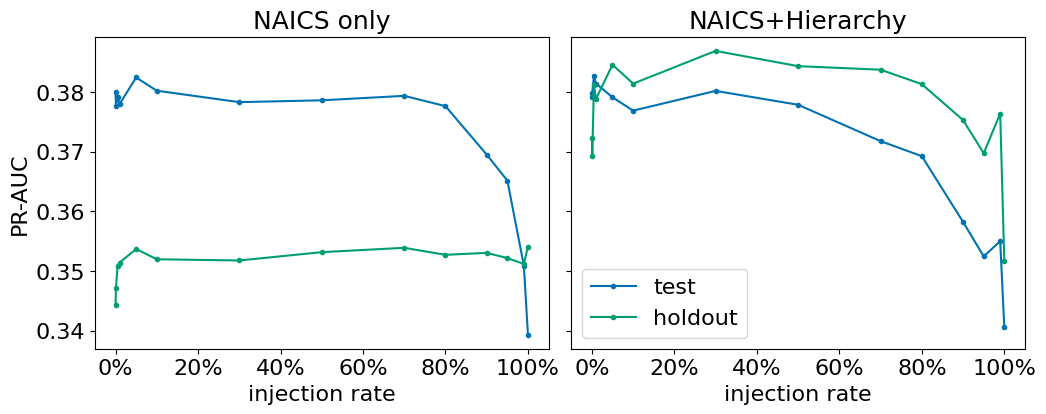

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
sbnn_plot.plot_metric_dependence(inj_metrics_reg[inj_metrics_reg['model'] == 'irloop naics data gen'],
                                 xformatter = ticker.PercentFormatter(1),
                                 ylabel='PR-AUC',
                                 title='NAICS only',
                                 xlabel='injection rate', ax=ax[0],
                                marker='.')
sbnn_plot.plot_metric_dependence(inj_metrics_reg[inj_metrics_reg['model'] == 'irloop naics+hier data gen'],
                                 xformatter = ticker.PercentFormatter(1),
                                 ylabel='PR-AUC',
                                 title='NAICS+Hierarchy',
                                 xlabel='injection rate', ax=ax[1],
                                marker='.')
ax[0].legend().set_visible(False)
plt.subplots_adjust(hspace=0.001, wspace=0.05, bottom=0.1)
fig.savefig(Path(setup.temp_path).joinpath('40_PLOT_injection_rate_comparison.png'),
        bbox_inches='tight')

##### Comparison plot - downsampled

In [50]:
# Non-downsampled tests, also test cases only
inj_metrics_ds = inj_metrics[(inj_metrics['model'].str.startswith('ds ')) &
                             (~inj_metrics['dset_naics_holdout'].isna())]

In [51]:
inj_metrics_ds['model'].value_counts()

model
ds irloop naics+hier data gen    24
ds irloop naics data gen         24
Name: count, dtype: int64

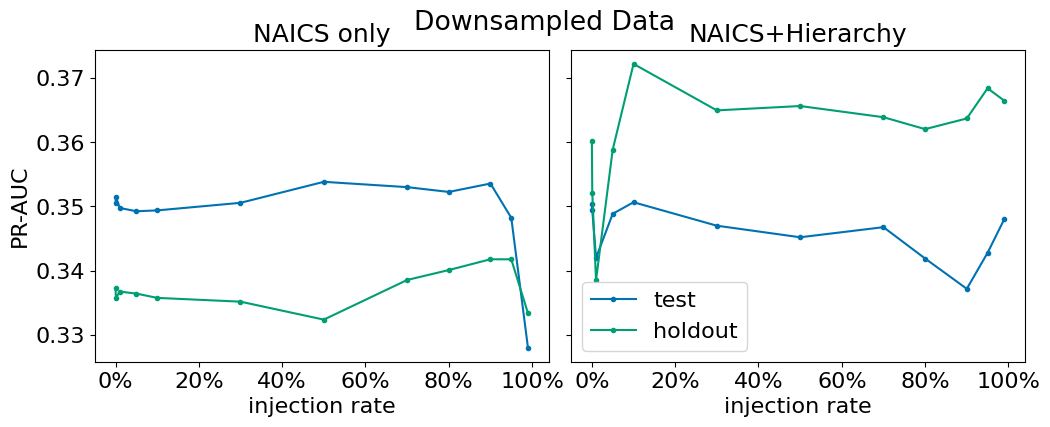

In [52]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharey=True, sharex=True)
sbnn_plot.plot_metric_dependence(inj_metrics_ds[inj_metrics_ds['model'] == 'ds irloop naics data gen'],
                                 xformatter = ticker.PercentFormatter(1),
                                 ylabel='PR-AUC',
                                 title='NAICS only',
                                 xlabel='injection rate', ax=ax[0],
                                marker='.')
sbnn_plot.plot_metric_dependence(inj_metrics_ds[inj_metrics_ds['model'] == 'ds irloop naics+hier data gen'],
                                 xformatter = ticker.PercentFormatter(1),
                                 ylabel='PR-AUC',
                                 title='NAICS+Hierarchy',
                                 xlabel='injection rate', ax=ax[1],
                                marker='.')
ax[0].legend().set_visible(False)
plt.subplots_adjust(wspace=0.05, bottom=0.1)
fig.suptitle('Downsampled Data')
fig.savefig(Path(setup.temp_path).joinpath('40_PLOT_injection_rate_comparison_ds.png'),
        bbox_inches='tight')